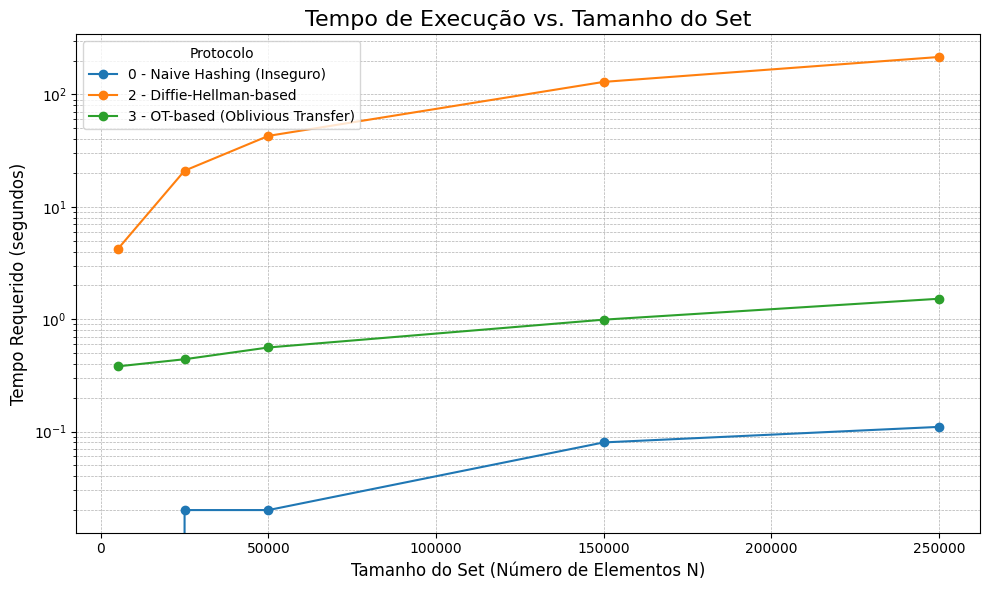

Gráfico 'Tempo vs. Tamanho do Set' salvo como tempo_vs_setsize.png


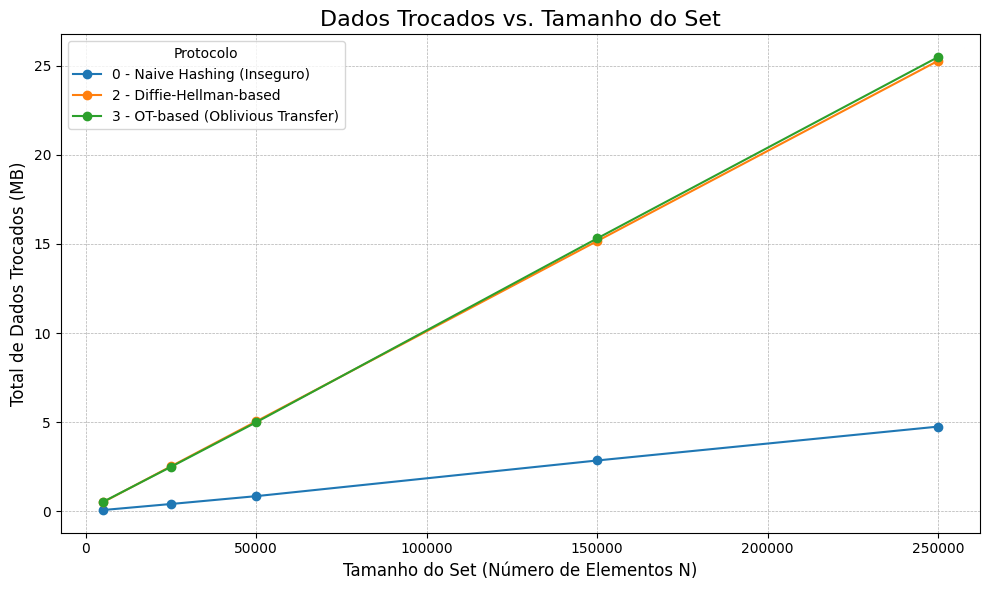

Gráfico 'Dados vs. Tamanho do Set' salvo como dados_vs_setsize.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. CARREGAR E PREPARAR OS DADOS ---

# Os dados foram extraídos da imagem 'image_03a1a2.png'
data = {
    'Protocolo': [0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3],
    'Tamanho_Set': [5000, 25000, 50000, 150000, 250000, 5000, 25000, 50000, 150000, 250000, 5000, 25000, 50000, 150000, 250000],
    'Tempo': [0, 0.02, 0.02, 0.08, 0.11, 4.18, 20.97, 42.8, 129.39, 215.55, 0.38, 0.44, 0.56, 0.99, 1.52],
    'Total_Dados': [0.08, 0.42, 0.86, 2.86, 4.76, 0.51, 2.53, 5.05, 15.16, 25.27, 0.53, 2.5, 5, 15.31, 25.48]
}

df = pd.DataFrame(data)

# Mapear os IDs dos protocolos para nomes legíveis (para a legenda do gráfico)
protocol_names = {
    0: "0 - Naive Hashing (Inseguro)",
    2: "2 - Diffie-Hellman-based",
    3: "3 - OT-based (Oblivious Transfer)"
}
df['Nome_Protocolo'] = df['Protocolo'].map(protocol_names)

# Agrupar os dados por protocolo para traçar as linhas
grouped_data = df.groupby('Nome_Protocolo')

# --- 2. GERAR O GRÁFICO: TEMPO vs. TAMANHO DO SET ---

plt.figure(figsize=(10, 6))
plt.title('Tempo de Execução vs. Tamanho do Set', fontsize=16)
plt.xlabel('Tamanho do Set (Número de Elementos N)', fontsize=12)
plt.ylabel('Tempo Requerido (segundos)', fontsize=12)

for name, group in grouped_data:
    plt.plot(group['Tamanho_Set'], group['Tempo'], marker='o', linestyle='-', label=name)

# Escala logarítmica no eixo Y para visualizar o Protocolo 0 e 3 (devido à diferença de magnitude)
plt.yscale('log')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend(title="Protocolo", loc='upper left')
plt.tight_layout()
plt.savefig('tempo_vs_setsize.png')
plt.show()
print("Gráfico 'Tempo vs. Tamanho do Set' salvo como tempo_vs_setsize.png")

# --- 3. GERAR O GRÁFICO: TOTAL DE DADOS vs. TAMANHO DO SET ---

plt.figure(figsize=(10, 6))
plt.title('Dados Trocados vs. Tamanho do Set', fontsize=16)
plt.xlabel('Tamanho do Set (Número de Elementos N)', fontsize=12)
plt.ylabel('Total de Dados Trocados (MB)', fontsize=12)

for name, group in grouped_data:
    plt.plot(group['Tamanho_Set'], group['Total_Dados'], marker='o', linestyle='-', label=name)

plt.grid(True, ls="--", linewidth=0.5)
plt.legend(title="Protocolo", loc='upper left')
plt.ticklabel_format(style='plain', axis='y') # Evita notação científica no eixo Y se não for necessário
plt.tight_layout()
plt.savefig('dados_vs_setsize.png')
plt.show()
print("Gráfico 'Dados vs. Tamanho do Set' salvo como dados_vs_setsize.png")

--- Tabela de Dados Agregados (Média e Desvio Padrão) ---
   protocol    Number  Time_mean  Time_std  Total Data_mean  Total Data_std
0    Diffie    5000.0   3.682040  0.058792       558.400000       27.609781
1    Diffie   10000.0   7.177160  0.178097      1083.800000       18.074844
2    Diffie   25000.0  17.434200  0.092795      2582.600000      163.344115
3    Diffie   50000.0  34.486920  0.144380      4544.200000      485.523635
4    Diffie  100000.0  68.536500  0.245462      7434.200000     1066.056612
5     Naive    5000.0   0.018700  0.001838        90.400000        0.894427
6     Naive   10000.0   0.024640  0.003109       182.000000        0.000000
7     Naive   25000.0   0.047040  0.011608       452.000000        0.000000
8     Naive   50000.0   0.089533  0.014806       904.000000        0.000000
9     Naive  100000.0   0.110100  0.027449      1947.000000       57.814358
10       OD    5000.0   0.339200  0.043082       549.600000        0.547723
11       OD   10000.0   0.3506

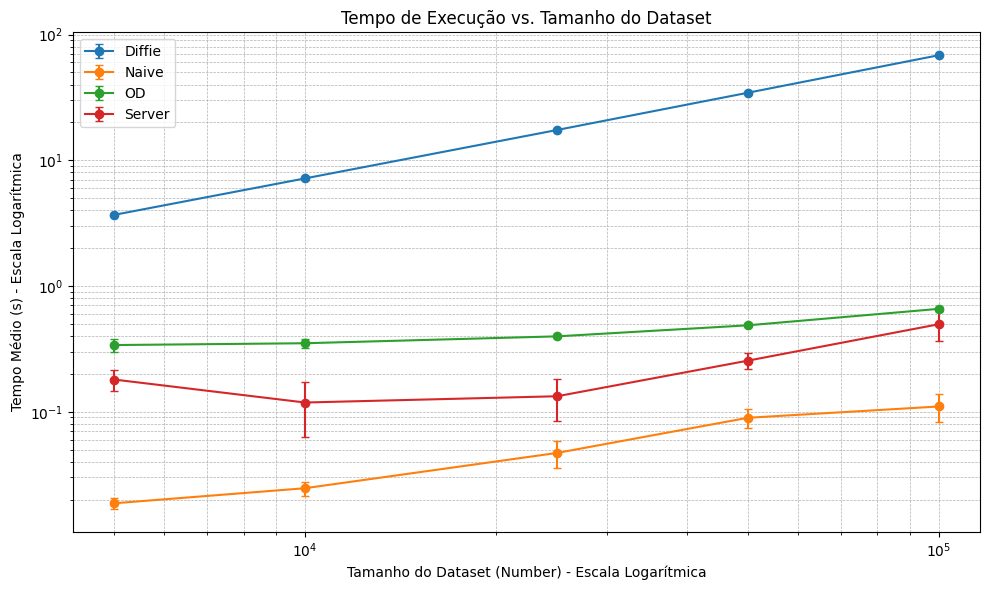

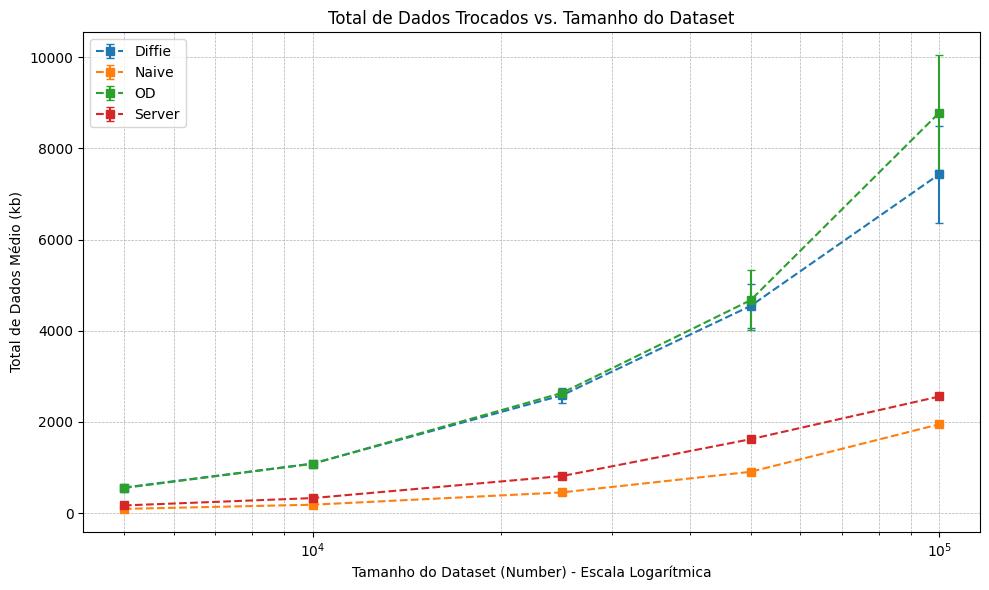

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import io # Necessário para ler uma string como se fosse um ficheiro

# --- 1. Dados "Hardcoded" ---
# Adicionámos os dados do protocolo 'Server' fornecidos na imagem.

csv_data = """
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,protocol,Number,Time,Packets,Data sent (kb) (0 -> 1),Data Received (kb) (1 -> 0),Total Data
,,,,Naive,5000,0.0175,25,45,45,90
,,,,Naive,5000,0.0181,27,45,45,90
,,,,Naive,5000,0.0219,26,45,45,90
,,,,Naive,5000,0.0175,32,46,46,92
,,,,Naive,5000,0.0185,26,45,45,90
,,,,Naive,10000,0.0255,34,91,91,182
,,,,Naive,10000,0.0243,30,91,91,182
,,,,Naive,10000,0.0197,37,91,91,182
,,,,Naive,10000,0.0282,37,91,91,182
,,,,Naive,10000,0.0255,37,91,91,182
,,,,Naive,25000,0.0651,41,226,226,452
,,,,Naive,25000,0.0388,42,226,226,452
,,,,Naive ,25000,0.0522,50,226,226,452
,,,,Naive,25000,0.0413,48,226,226,452
,,,,Naive ,25000,0.0378,49,226,226,452
,,,,Naive,50000,0.1078,73,452,452,904
,,,,Naive ,50000,0.0809,66,452,452,904
,,,,Naive ,50000,0.0775,74,452,452,904
,,,,Naive ,50000,0.1092,66,452,452,904
,,,,Naive ,50000,0.0828,67,452,452,904
,,,,Naive ,50000,0.079,67,452,452,904
,,,,Naive ,100000,0.1139,102,1003,1003,2006
,,,,Naive ,100000,0.136,106,921,1003,1924
,,,,Naive ,100000,0.1302,108,920,1003,1923
,,,,Naive ,100000,0.0667,112,1003,872,1875
,,,,Naive ,100000,0.1037,124,1003,1004,2007
,,,,Diffie,5000,3.6649,49,186,379,565
,,,,Diffie,5000,3.6332,45,186,346,532
,,,,Diffie,5000,3.6619,55,186,379,565
,,,,Diffie,5000,3.6658,49,186,346,532
,,,,Diffie,5000,3.7844,58,186,412,598
,,,,Diffie,10000,6.9515,80,372,692,1064
,,,,Diffie,10000,7.0432,72,372,692,1064
,,,,Diffie,10000,7.3943,82,372,725,1097
,,,,Diffie,10000,7.2296,74,372,725,1097
,,,,Diffie,10000,7.2672,83,372,725,1097
,,,,Diffie,25000,17.5203,146,929,1664,2593
,,,,Diffie,25000,17.3989,129,928,1743,2671
,,,,Diffie,25000,17.3246,151,929,1763,2692
,,,,Diffie,25000,17.386,132,929,1369,2298
,,,,Diffie,25000,17.5412,145,929,1730,2659
,,,,Diffie,50000,34.3563,180,806,3456,4262
,,,,Diffie,50000,34.5367,200,1855,3293,5148
,,,,Diffie,50000,34.694,177,1495,2621,4116
,,,,Diffie,50000,34.5044,165,725,3479,4204
,,,,Diffie,50000,34.3432,219,1824,3167,4991
,,,,Diffie,100000,68.5723,234,2724,4475,7199
,,,,Diffie,100000,68.7884,200,1643,5017,6660
,,,,Diffie,100000,68.1577,217,858,5794,6652
,,,,Diffie,100000,68.7017,270,2857,4558,7415
,,,,Diffie,100000,68.4624,293,3707,5538,9245
,,,,OD,5000,0.4148,67,395,155,550
,,,,OD,5000,0.3105,56,395,155,550
,,,,OD,5000,0.3179,50,394,155,549
,,,,OD,5000,0.3192,51,394,155,549
,,,,OD,5000,0.3336,59,395,155,550
WELCOME TO PANDAS
,,,,OD,10000,0.3525,72,789,291,1080
,,,,OD,10000,0.3237,66,788,291,1079
,,,,OD,10000,0.3431,96,789,292,1081
,,,,OD,10000,0.3981,80,789,291,1080
,,,,OD,10000,0.3358,72,789,291,1080
,,,,OD,25000,0.3925,130,1937,698,2635
,,,,OD,25000,0.3996,135,1937,698,2635
,,,,OD,25000,0.3989,130,1937,698,2635
,,,,OD,25000,0.3947,130,1937,698,2635
,,,,OD,25000,0.4034,117,1937,697,2634
,,,,OD,50000,0.4759,175,3873,1013,4886
,,,,OD,50000,0.4851,204,3548,992,4540
,,,,OD,50000,0.508,182,3873,1374,5247
,,,,OD,50000,0.4644,143,2824,776,3600
,,,,OD,50000,0.5014,197,3706,1375,5081
,,,,OD,100000,0.6679,325,7711,3029,10740
,,,,OD,100000,0.6142,247,7710,910,8620
,,,,OD,100000,0.6531,259,6920,1040,7960
,,,,OD,100000,0.6687,248,6466,994,7460
,,,,OD,100000,0.6871,316,7315,1830,9145
,,,,Server,5000,0.164,,,,166
,,,,Server,5000,0.158,,,,166
,,,,Server,5000,0.219,,,,166
,,,,Server,10000,0.169,,,,328
,,,,Server,10000,0.174,,,,328
,,,,Server,10000,0.04,,,,327
,,,,Server,10000,0.096,,,,328
,,,,Server,10000,0.113,,,,325
,,,,Server,25000,0.078,,,,807
,,,,Server,25000,0.081,,,,811
,,,,Server,25000,0.16,,,,812
,,,,Server,25000,0.168,,,,812
,,,,Server,25000,0.177,,,,811
,,,,Server,50000,0.209,,,,1617
,,,,Server,50000,0.227,,,,1621
,,,,Server,50000,0.245,,,,1621
,,,,Server,50000,0.252,,,,1621
,,,,Server,50000,0.292,,,,1619
,,,,Server,50000,0.305,,,,1619
,,,,Server,100000,0.336,,,,2564
,,,,Server,100000,0.375,,,,2564
,,,,Server,100000,0.558,,,,2552
,,,,Server,100000,0.588,,,,2552
,,,,Server,100000,0.627,,,,2553
"""

# Tentar ler os dados da string
try:
    # Usamos io.StringIO para que o pandas leia a string 'csv_data' como um ficheiro
    # header=3 diz ao pandas para ignorar as 3 primeiras linhas e usar a 4ª como cabeçalho
    df = pd.read_csv(io.StringIO(csv_data), header=3)
    
except Exception as e:
    print(f"Ocorreu um erro ao ler os dados da string: {e}")
    sys.exit()

# --- 2. Limpar e Processar os Dados ---

# Selecionar apenas as colunas de interesse
try:
    # NOTA: O protocolo 'Server' tem valores NaN nas colunas Data sent e Data Received,
    # mas o 'Total Data' está preenchido. Como só usamos 'Time' e 'Total Data',
    # as outras colunas não causam problemas.
    df = df[['protocol', 'Number', 'Time', 'Total Data']]
except KeyError as e:
    print(f"Erro: Coluna não encontrada: {e}.")
    print("Verifique se as colunas 'protocol', 'Number', 'Time', e 'Total Data' estão corretas.")
    sys.exit()

# Remover linhas que tenham valores Nulos (NaN)
# (Isto remove também a linha 'WELCOME TO PANDAS' e outras linhas incompletas)
df = df.dropna(subset=['protocol', 'Number', 'Time', 'Total Data'])

# Limpar espaços em branco na coluna 'protocol' (ex: "Naive " -> "Naive")
df['protocol'] = df['protocol'].str.strip()

# Garantir que as colunas numéricas são, de facto, numéricas
df['Number'] = pd.to_numeric(df['Number'], errors='coerce')
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
df['Total Data'] = pd.to_numeric(df['Total Data'], errors='coerce')

# Remover linhas onde a conversão para número falhou
df = df.dropna()

# --- 3. Calcular Média e Desvio Padrão ---

# Agrupar por protocolo e tamanho do dataset (Number)
agg_df = df.groupby(['protocol', 'Number'])[['Time', 'Total Data']].agg(['mean', 'std'])

# Aplainar os nomes das colunas
agg_df.columns = ['_'.join(col).strip() for col in agg_df.columns.values]
agg_df = agg_df.reset_index()

# --- 4. Apresentar Dados Agregados ---

print("--- Tabela de Dados Agregados (Média e Desvio Padrão) ---")
print(agg_df.to_string())
print("\n")

# --- 5. Gerar Gráficos ---

protocols = agg_df['protocol'].unique()

# --- Gráfico 1: Tempo vs. Tamanho do Dataset ---
print("A gerar 'tempo_vs_dataset.png'...")

plt.figure(figsize=(10, 6))
ax1 = plt.gca()

for proto in protocols:
    proto_data = agg_df[agg_df['protocol'] == proto]
    # Adicionamos 'yerr' para mostrar o desvio padrão como barras de erro
    ax1.errorbar(proto_data['Number'], proto_data['Time_mean'], yerr=proto_data['Time_std'], 
                 label=proto, marker='o', linestyle='-', capsize=3)

ax1.set_yscale('log')
ax1.set_xscale('log') # Adicionado escala logarítmica para o eixo X, melhora a visualização
ax1.set_xlabel('Tamanho do Dataset (Number) - Escala Logarítmica')
ax1.set_ylabel('Tempo Médio (s) - Escala Logarítmica')
ax1.set_title('Tempo de Execução vs. Tamanho do Dataset')
ax1.legend()
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout() 
plt.savefig('tempo_vs_dataset.png')
print(f"Gráfico 'tempo_vs_dataset.png' guardado com sucesso.")

# --- Gráfico 2: Total de Dados vs. Tamanho do Dataset ---
print("A gerar 'dados_vs_dataset.png'...")

plt.figure(figsize=(10, 6))
ax2 = plt.gca()

for proto in protocols:
    proto_data = agg_df[agg_df['protocol'] == proto]
    # Adicionamos 'yerr' para mostrar o desvio padrão como barras de erro
    ax2.errorbar(proto_data['Number'], proto_data['Total Data_mean'], yerr=proto_data['Total Data_std'],
                 label=proto, marker='s', linestyle='--', capsize=3)

ax2.set_xscale('log') # Adicionado escala logarítmica para o eixo X
ax2.set_xlabel('Tamanho do Dataset (Number) - Escala Logarítmica')
ax2.set_ylabel('Total de Dados Médio (kb)')
ax2.set_title('Total de Dados Trocados vs. Tamanho do Dataset')
ax2.legend()
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig('dados_vs_dataset.png')
print(f"Gráfico 'dados_vs_dataset.png' guardado com sucesso.")

print("\nProcessamento concluído.")